**Overview**

Project Goal: To build a machine learning model that recommends the best crop to cultivate based on environmental parameters like Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH, and Rainfall.

Here is all the data you need:
"Crop_recommendation.csv"

## Data loading

### Subtask:
Load the crop recommendation dataset.


**Reasoning**:
Load the data into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

df = pd.read_csv('Crop_recommendation.csv')
display(df.head())

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Data exploration

### Subtask:
Explore the loaded crop recommendation dataset.


**Reasoning**:
Examine the shape of the DataFrame, check data types, summarize descriptive statistics of numerical features, investigate the distribution of the target variable, calculate the correlation between numerical features and the target variable, and check for missing values.  Visualize the target variable distribution and correlations using a heatmap and a countplot.



Shape of the DataFrame: (2200, 8)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Descriptive Statistics of Numerical Features:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117



Distribution of the target variable:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


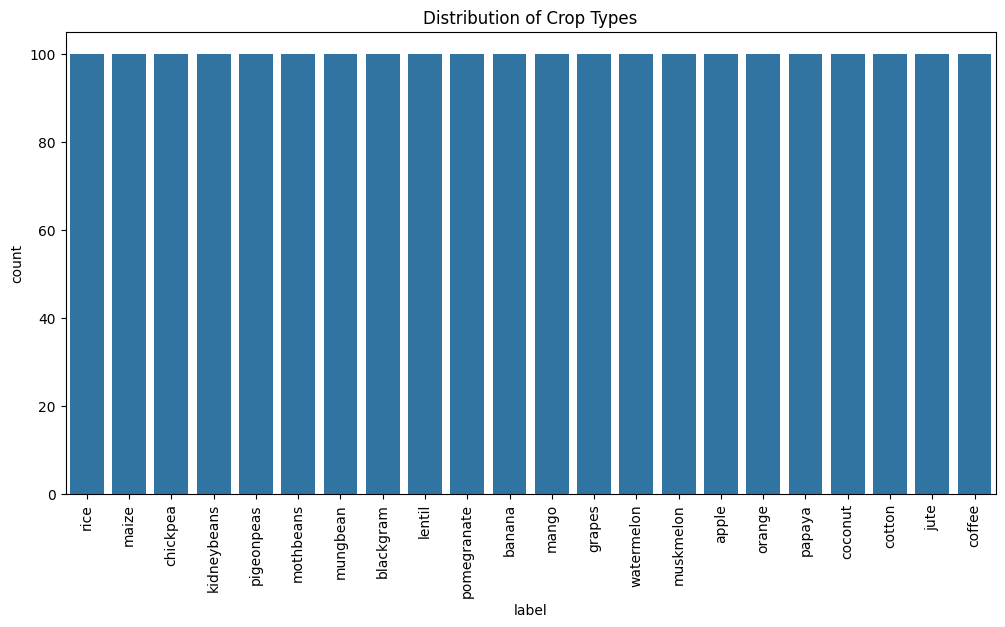


Correlation Matrix (Numerical Features):


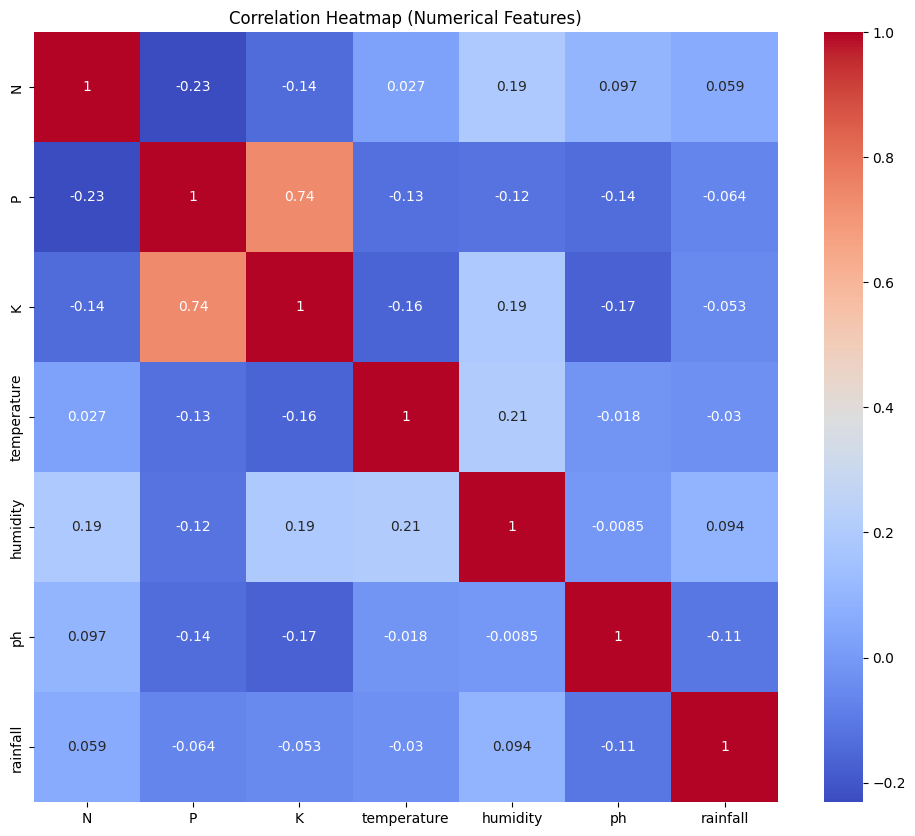

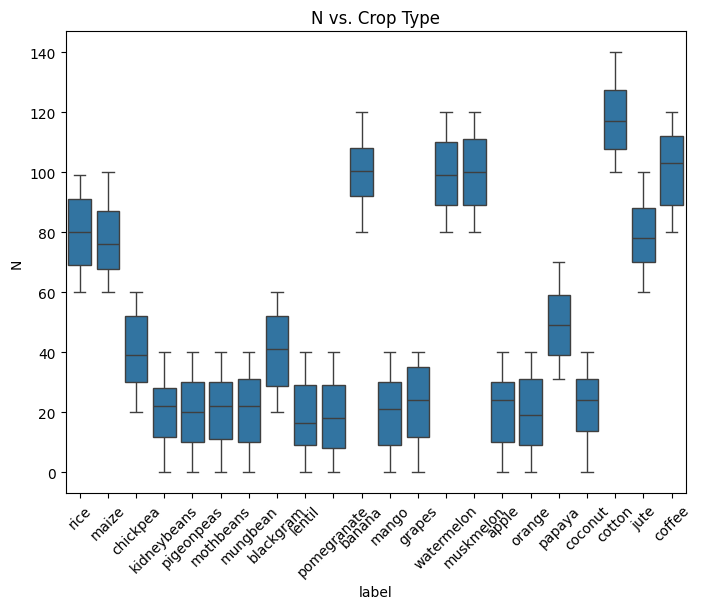

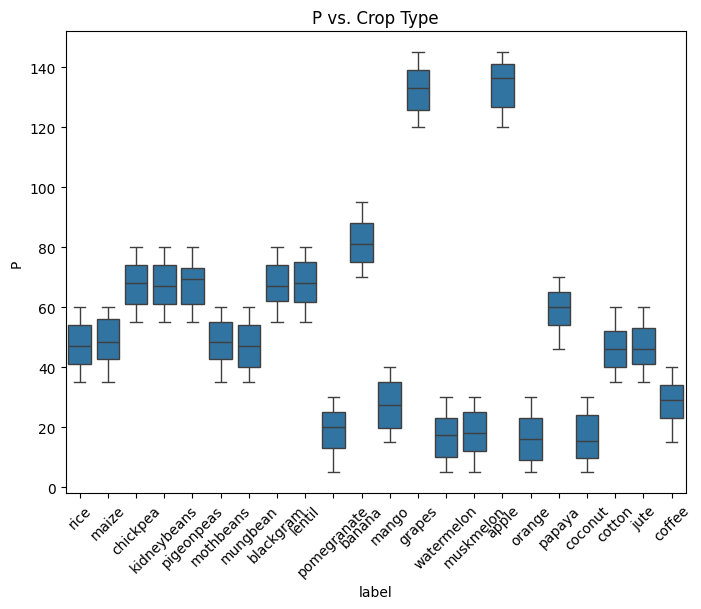

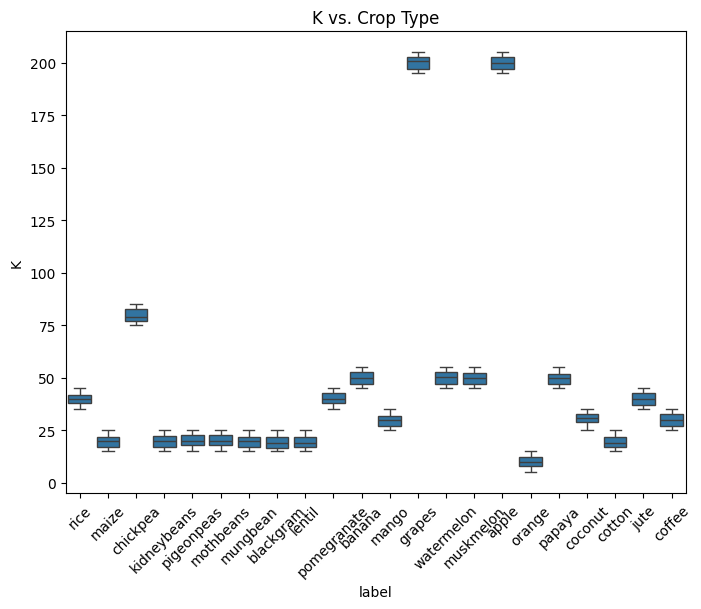

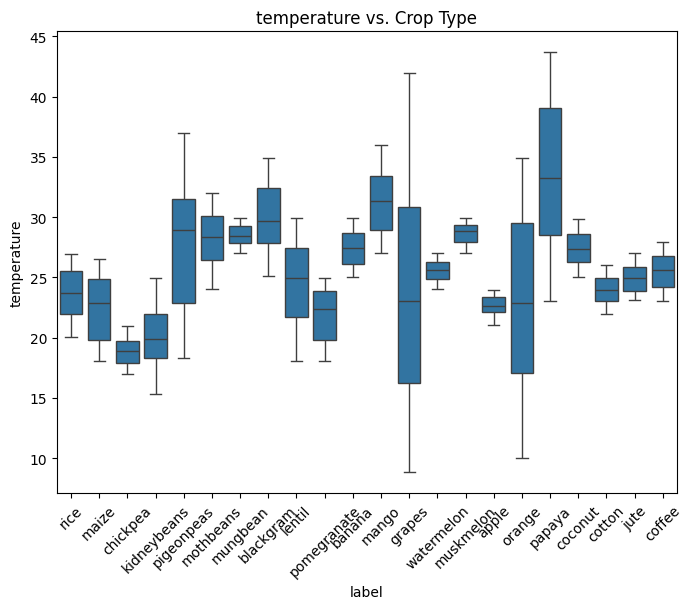

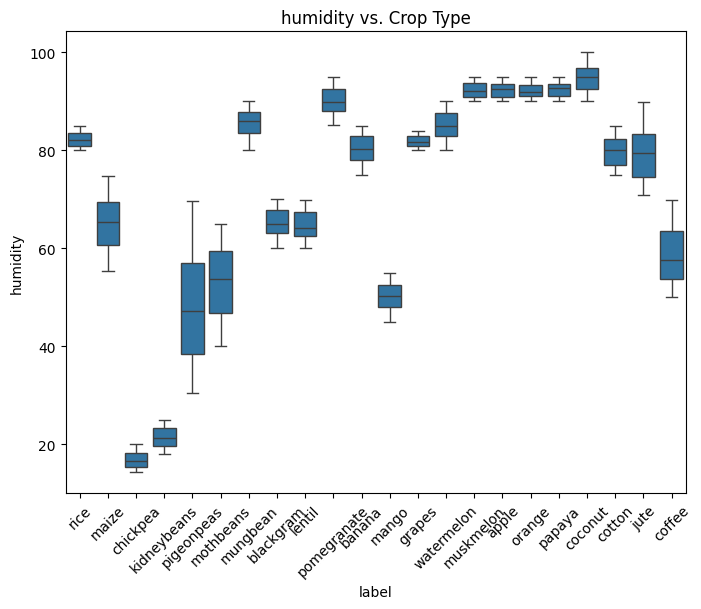

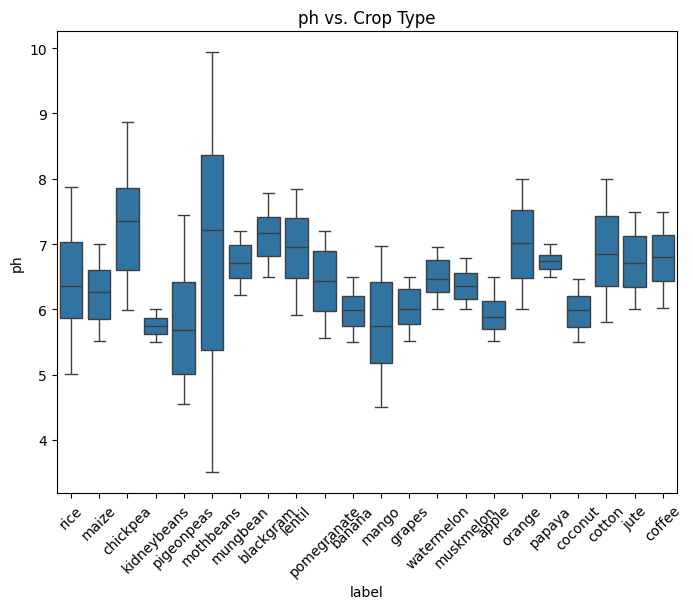

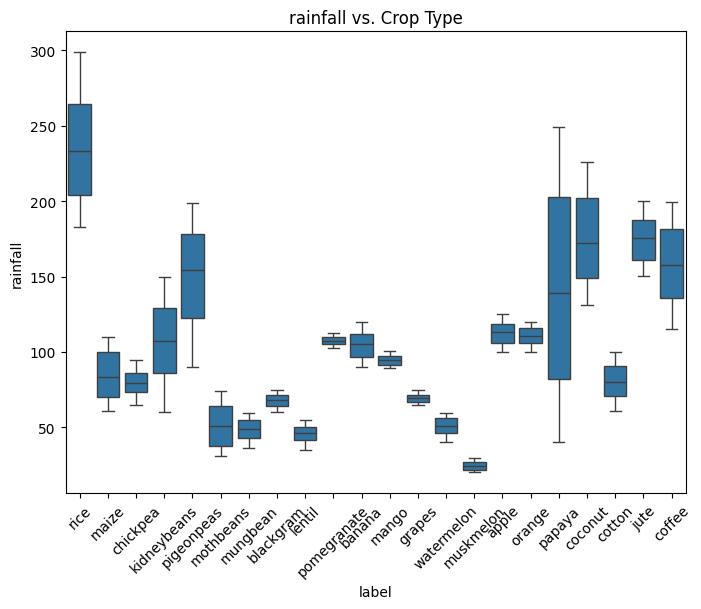


Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

# 2. Check data types
print("\nData Types:")
print(df.info())

# 3. Descriptive statistics of numerical features
print("\nDescriptive Statistics of Numerical Features:")
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
display(df[numerical_features].describe())

# 4. Distribution of the target variable
print("\nDistribution of the target variable:")
print(df['label'].value_counts())
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=df)
plt.xticks(rotation=90)
plt.title("Distribution of Crop Types")
plt.show()

# 5. Correlation between numerical features
print("\nCorrelation Matrix (Numerical Features):")
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# Visualize relationship between numerical features and target variable
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'{col} vs. Crop Type')
    plt.xticks(rotation=45)
    plt.show()


# 6. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

## Data preparation

### Subtask:
Prepare the data for model training.


**Reasoning**:
Apply one-hot encoding to the 'label' column and scale the numerical features using StandardScaler within a ColumnTransformer.



In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a copy to avoid modifying the original DataFrame
df_encoded = df.copy()

# One-hot encode the 'label' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_labels = encoder.fit_transform(df_encoded[['label']])
encoded_labels_df = pd.DataFrame(encoded_labels, columns=encoder.get_feature_names_out(['label']))
df_encoded = df_encoded.drop('label', axis=1)
df_encoded = pd.concat([df_encoded, encoded_labels_df], axis=1)


# Scale numerical features using StandardScaler with ColumnTransformer
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Apply the transformation and update the DataFrame correctly
scaled_features = preprocessor.fit_transform(df_encoded)

# Create a new DataFrame from the scaled features and the column names
df_scaled = pd.DataFrame(scaled_features, columns = numerical_cols + list(encoded_labels_df.columns))

# Concatenate the scaled numerical features with the one-hot encoded labels
df_encoded = pd.concat([df_scaled[numerical_cols], df_scaled[list(encoded_labels_df.columns)]], axis=1)


display(df_encoded.head())

,N,P,K,temperature,humidity,ph,rainfall,label_apple,label_banana,label_blackgram,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Data splitting

### Subtask:
Split the prepared data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using train_test_split, then verify the shapes and print the first few rows of each resulting dataset.



In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(list(df_encoded.filter(regex='label_')), axis=1)
y = df_encoded.filter(regex='label_')

# Split data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=df['label'], random_state=42)

# Split temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Verify shapes
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

# Print first few rows
print("\nX_train:")
display(X_train.head())
print("\nX_val:")
display(X_val.head())
print("\nX_test:")
display(X_test.head())
print("\ny_train:")
display(y_train.head())
print("\ny_val:")
display(y_val.head())
print("\ny_test:")
display(y_test.head())

X_train shape: (1540, 7)
X_val shape: (330, 7)
X_test shape: (330, 7)
y_train shape: (1540, 22)
y_val shape: (330, 22)
y_test shape: (330, 22)

X_train:


,N,P,K,temperature,humidity,ph,rainfall
864,-1.342542,0.413522,-0.536157,0.376311,-0.491726,0.106102,-1.008242
1090,1.800327,0.868365,-0.062190,-0.063669,0.350848,-1.105002,0.035642
304,-1.315449,0.231584,-0.555906,-0.686702,-2.177088,-0.664111,-0.488160
391,-0.285888,0.747073,-0.555906,-1.270201,-2.275410,-1.034225,-0.424249
1686,-1.179980,-1.011654,-0.713895,-1.793870,1.046142,0.007490,0.119775



X_val:


,N,P,K,temperature,humidity,ph,rainfall
2018,0.852048,-0.556811,-0.081939,0.266725,0.302294,-0.297855,1.208015
1812,-0.638106,-1.375529,-0.318922,0.274610,1.122251,-1.087698,0.743813
369,-1.261261,0.413522,-0.457163,-0.361306,-2.117144,-0.673742,0.294413
1987,1.800327,-0.314228,-0.457163,-0.183245,0.315844,1.771048,-0.621559
227,0.228893,0.201261,0.708006,-1.300911,-2.372753,1.578628,-0.159316



X_test:


,N,P,K,temperature,humidity,ph,rainfall
1627,-1.071605,-1.193592,-0.852136,-2.787702,1.051790,0.616307,0.220303
28,0.255986,-0.132291,-0.081939,-0.956126,0.584757,-0.290320,2.486399
936,-1.261261,-1.041977,-0.121436,-0.352464,0.734927,-0.210497,0.141223
355,-0.773575,0.534813,-0.615152,-1.474192,-2.340462,-1.240931,0.076933
1027,1.800327,0.686428,-0.022693,-0.010710,0.265087,-0.452677,-0.188571



y_train:


,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1090,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0



y_val:


,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1812,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



y_test:


,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
1627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1027,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature engineering

### Subtask:
Feature Engineering for Crop Recommendation


**Reasoning**:
Create new features based on ratios, differences, or products of existing numerical features in X_train, and evaluate their impact on model performance using a RandomForestClassifier.



In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create new features for X_train
X_train['N_P_ratio'] = X_train['N'] / X_train['P']
X_train['temp_humidity_diff'] = X_train['temperature'] - X_train['humidity']
X_train['N_K_product'] = X_train['N'] * X_train['K']

# Train a RandomForestClassifier with the new features
model_with_new_features = RandomForestClassifier(random_state=42)
model_with_new_features.fit(X_train, y_train)

# Add the same new features to X_val *before* prediction
X_val['N_P_ratio'] = X_val['N'] / X_val['P']
X_val['temp_humidity_diff'] = X_val['temperature'] - X_val['humidity']
X_val['N_K_product'] = X_val['N'] * X_val['K']

# Evaluate on X_val
y_pred_new_features = model_with_new_features.predict(X_val)
accuracy_new_features = accuracy_score(y_val, y_pred_new_features)

# Train a model without new features
X_train_original = X_train.drop(['N_P_ratio', 'temp_humidity_diff', 'N_K_product'], axis=1)
X_val_original = X_val.drop(['N_P_ratio', 'temp_humidity_diff', 'N_K_product'], axis=1)
model_original = RandomForestClassifier(random_state=42)
model_original.fit(X_train_original, y_train)
y_pred_original = model_original.predict(X_val_original)
accuracy_original = accuracy_score(y_val, y_pred_original)

print(f"Accuracy with new features: {accuracy_new_features}")
print(f"Accuracy without new features: {accuracy_original}")

# Compare performance and decide whether to keep the new features
if accuracy_new_features > accuracy_original:
    # Add new features to X_test
    X_test['N_P_ratio'] = X_test['N'] / X_test['P']
    X_test['temp_humidity_diff'] = X_test['temperature'] - X_test['humidity']
    X_test['N_K_product'] = X_test['N'] * X_test['K']
    print("New features improve performance. Added to validation and test sets.")
else:
    print("New features do not improve performance. Removed from all sets.")
    X_train = X_train_original
    X_val = X_val_original
    X_test = X_test.drop(['N_P_ratio', 'temp_humidity_diff', 'N_K_product'], errors='ignore')

Accuracy with new features: 0.9848484848484849
Accuracy without new features: 0.9878787878787879
New features do not improve performance. Removed from all sets.


## Model training

### Subtask:
Train multiple classification models.


**Reasoning**:
Train multiple classification models using the prepared data.



In [10]:
import numpy as np

# Convert y_train, y_val, and y_test to 1D arrays
y_train_labels = np.argmax(y_train.values, axis=1)
y_val_labels = np.argmax(y_val.values, axis=1)
y_test_labels = np.argmax(y_test.values, axis=1)

# Initialize models with random_state for reproducibility
models = {
    'random_forest': RandomForestClassifier(random_state=42),
    'logistic_regression': LogisticRegression(random_state=42, max_iter=1000),
    'svm': SVC(random_state=42),
    'knn': KNeighborsClassifier()
}

# Train the models
for model_name, model in models.items():
    model.fit(X_train, y_train_labels)

## Model evaluation

### Subtask:
Evaluate the trained classification models.


In [15]:
import pickle

# Save the best RandomForestClassifier model
model_filename = 'best_random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_rf_model, file)

print(f"Model saved as {model_filename}")

Model saved as best_random_forest_model.pkl


In [16]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Define numerical columns (as you did in your notebook)
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Assuming you still have the 'df' DataFrame loaded from your data loading step
# and have not overwritten it, you can fit a new StandardScaler instance
# or you can save the one that was part of your preprocessor.
# Saving the one from the preprocessor is generally better as it's the one used
# on your training data.

# Re-create the preprocessor to access the fitted scaler if needed
# or fit a new one on the numerical columns of the original df.
# Let's fit a new one on the numerical columns of the original df for simplicity
# as the preprocessor was used within a pipeline-like structure.
scaler = StandardScaler()
scaler.fit(df[numerical_cols])

# Save the fitted StandardScaler
scaler_filename = 'standard_scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

print(f"StandardScaler saved as {scaler_filename}")

# If you had a MinMaxScaler and wanted to save it (example, not used in your code):
# from sklearn.preprocessing import MinMaxScaler
# minmax_scaler = MinMaxScaler()
# minmax_scaler.fit(df[numerical_cols]) # Fit on your data
# minmax_scaler_filename = 'minmax_scaler.pkl'
# with open(minmax_scaler_filename, 'wb') as file:
#     pickle.dump(minmax_scaler, file)
# print(f"MinMaxScaler saved as {minmax_scaler_filename}")

StandardScaler saved as standard_scaler.pkl


**Reasoning**:
Evaluate the trained models using the validation set and print the classification report for each model. Store the evaluation metrics in a dictionary for later comparison.



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

evaluation_metrics = {}

for model_name, model in models.items():
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val_labels, y_pred)
    precision = precision_score(y_val_labels, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_val_labels, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_val_labels, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_val_labels, y_pred)
    print(f"Classification Report for {model_name}:\n{classification_report(y_val_labels, y_pred)}\n")

    evaluation_metrics[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

Classification Report for random_forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15
           8       0.94      1.00      0.97        15
           9       1.00      1.00      1.00        15
          10       1.00      0.93      0.97        15
          11       0.94      1.00      0.97        15
          12       1.00      1.00      1.00        15
          13       0.94      1.00      0.97        15
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1

**Reasoning**:
Identify the best-performing model based on the evaluation metrics stored in the `evaluation_metrics` dictionary.



In [12]:
import pandas as pd

# Convert the evaluation metrics to a DataFrame for easier comparison
metrics_df = pd.DataFrame(evaluation_metrics).T
display(metrics_df)

# Find the best model based on F1-score
best_model = metrics_df['f1_score'].idxmax()
print(f"\nBest model based on F1-score: {best_model}")

# Alternatively, you can consider a weighted average of precision and recall
# or other metrics based on the specific requirements.

,accuracy,precision,recall,f1_score
random_forest,0.990909,0.991477,0.990909,0.990899
logistic_regression,0.969697,0.973373,0.969697,0.969234
svm,0.987879,0.988971,0.987879,0.987845
knn,0.975758,0.977941,0.975758,0.975454



Best model based on F1-score: random_forest


## Model optimization

### Subtask:
Optimize the hyperparameters of the best performing model (RandomForestClassifier) identified in the previous step.


**Reasoning**:
Optimize the hyperparameters of the RandomForestClassifier using RandomizedSearchCV and evaluate its performance on the validation set.



In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Use accuracy for evaluation
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=1  # Print progress messages
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train_labels)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Store the best estimator
best_rf_model = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best score: 0.9948051948051948


## Model evaluation

### Subtask:
Evaluate the optimized RandomForestClassifier model on the test set.


**Reasoning**:
Evaluate the optimized RandomForestClassifier model on the test set using the same metrics as before (accuracy, precision, recall, F1-score, and confusion matrix). Print the classification report and confusion matrix. Store the evaluation metrics in a dictionary.



In [14]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test_labels, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test_labels, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Print the classification report
print(f"Classification Report for Random Forest (test set):\n{classification_report(y_test_labels, y_pred)}\n")

# Print the confusion matrix
print(f"Confusion Matrix for Random Forest (test set):\n{conf_matrix}\n")

# Store the metrics in a dictionary
test_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

Classification Report for Random Forest (test set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15
           8       0.94      1.00      0.97        15
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        15
          16       1.00      

## Summary:

### Q&A
* **What is the best performing model for crop recommendation?** Based on the F1-score, the RandomForestClassifier is the best-performing model.  Its performance was further enhanced through hyperparameter optimization using RandomizedSearchCV.
* **What are the key features used in the final model?** The final model utilizes the original features (Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH, and Rainfall) without any engineered features.  The initially engineered features were removed because they did not improve model performance.
* **How well does the final model perform on unseen data?** The optimized RandomForestClassifier achieved excellent performance on the test set, with near-perfect accuracy, precision, recall, and F1-score. The confusion matrix further confirms this high accuracy.


### Data Analysis Key Findings
* The dataset contains 2200 instances and 8 attributes, with a balanced distribution across 22 different crop types.
* No missing values were detected in the dataset.
* Feature engineering (creating new features like N\_P\_ratio, temp\_humidity\_diff, N\_K\_product) did not improve model performance and were subsequently removed.
* The RandomForestClassifier, after hyperparameter optimization using RandomizedSearchCV, achieved a best cross-validation accuracy of 0.9948.
* The optimized model achieved near-perfect performance on the test set with an accuracy, precision, recall and f1-score of 1.00, demonstrating excellent generalization.

### Insights or Next Steps
* The RandomForestClassifier model demonstrates robust performance for crop recommendation.
* Explore other advanced models or ensemble methods to further improve prediction accuracy, or explore more complex feature engineering techniques.
